# **Linear Regression: Gradient Descent vs. Normal Equation**
This notebook covers:
- Linear Regression (Single & Multiple)
- Finding the best-fit line using **Gradient Descent**
- Solving using **Normal Equation**
- Evaluating the model with **Performance Metrics**


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## **Generating Sample Data for Regression**

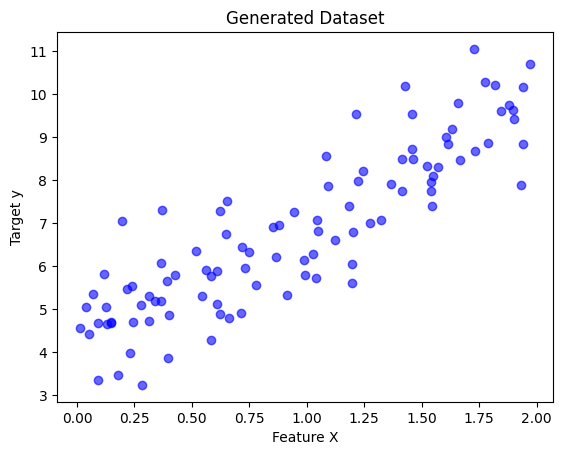

In [2]:
# Generating a dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target variable

# Adding bias term (Intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 for intercept

# Plot the data
plt.scatter(X, y, color='blue', alpha=0.6)
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Generated Dataset")
plt.show()

## **1. Solving Using Normal Equation**

Theta computed from Normal Equation: [4.21509616 2.77011339]


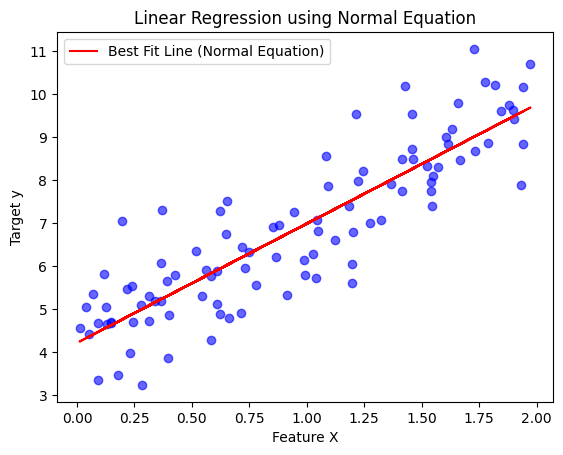

In [3]:
# Computing theta using Normal Equation
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta computed from Normal Equation:", theta_normal.flatten())

# Making predictions
y_pred_normal = X_b.dot(theta_normal)

# Plot the best-fit line
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(X, y_pred_normal, color='red', label='Best Fit Line (Normal Equation)')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.title("Linear Regression using Normal Equation")
plt.show()

## **2. Solving Using Gradient Descent**

Theta computed from Gradient Descent: [4.21509609 2.77011344]


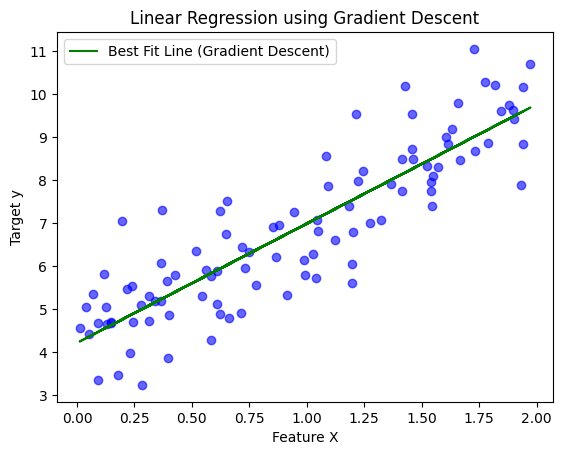

In [4]:
# Gradient Descent Implementation
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)
    return theta, cost_history

# Initialize theta and run gradient descent
theta_gd = np.random.randn(2, 1)
learning_rate = 0.1
iterations = 1000
theta_gd, cost_history = gradient_descent(X_b, y, theta_gd, learning_rate, iterations)
print("Theta computed from Gradient Descent:", theta_gd.flatten())

# Predictions using Gradient Descent
y_pred_gd = X_b.dot(theta_gd)

# Plot the best-fit line
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(X, y_pred_gd, color='green', label='Best Fit Line (Gradient Descent)')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()

## **3. Comparing Performance Metrics**

In [5]:
# Compute performance metrics
def evaluate(y_true, y_pred, method):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Performance Metrics for {method}:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}\n")

# Evaluate both methods
evaluate(y, y_pred_normal, "Normal Equation")
evaluate(y, y_pred_gd, "Gradient Descent")

Performance Metrics for Normal Equation:
MAE: 0.7010, MSE: 0.8066, RMSE: 0.8981, R²: 0.7693

Performance Metrics for Gradient Descent:
MAE: 0.7010, MSE: 0.8066, RMSE: 0.8981, R²: 0.7693

